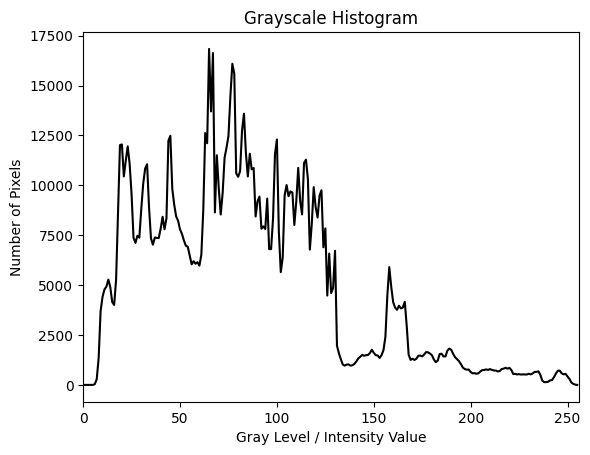

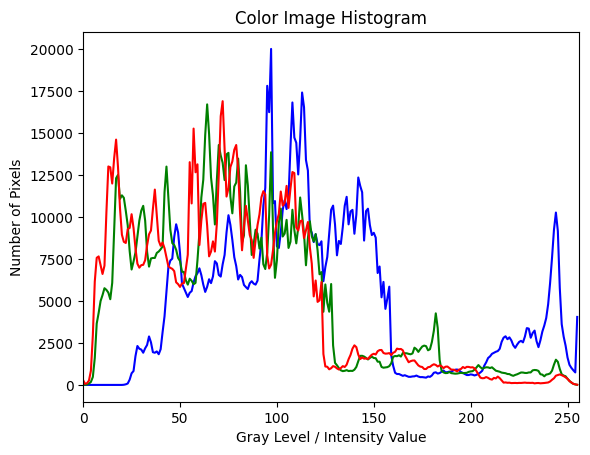

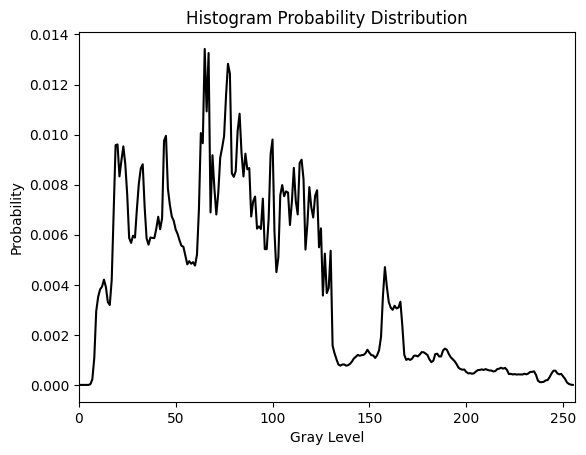

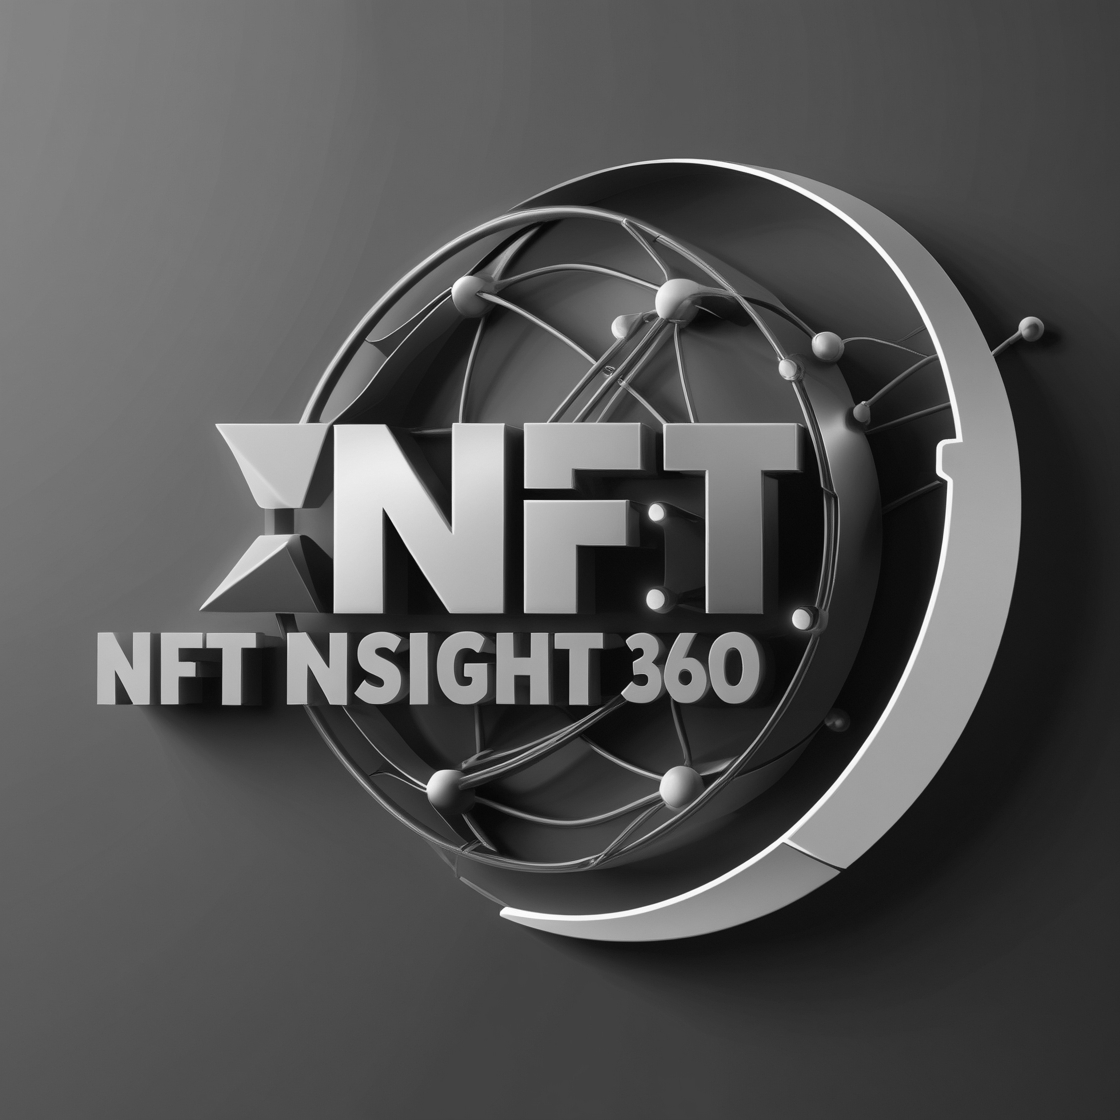

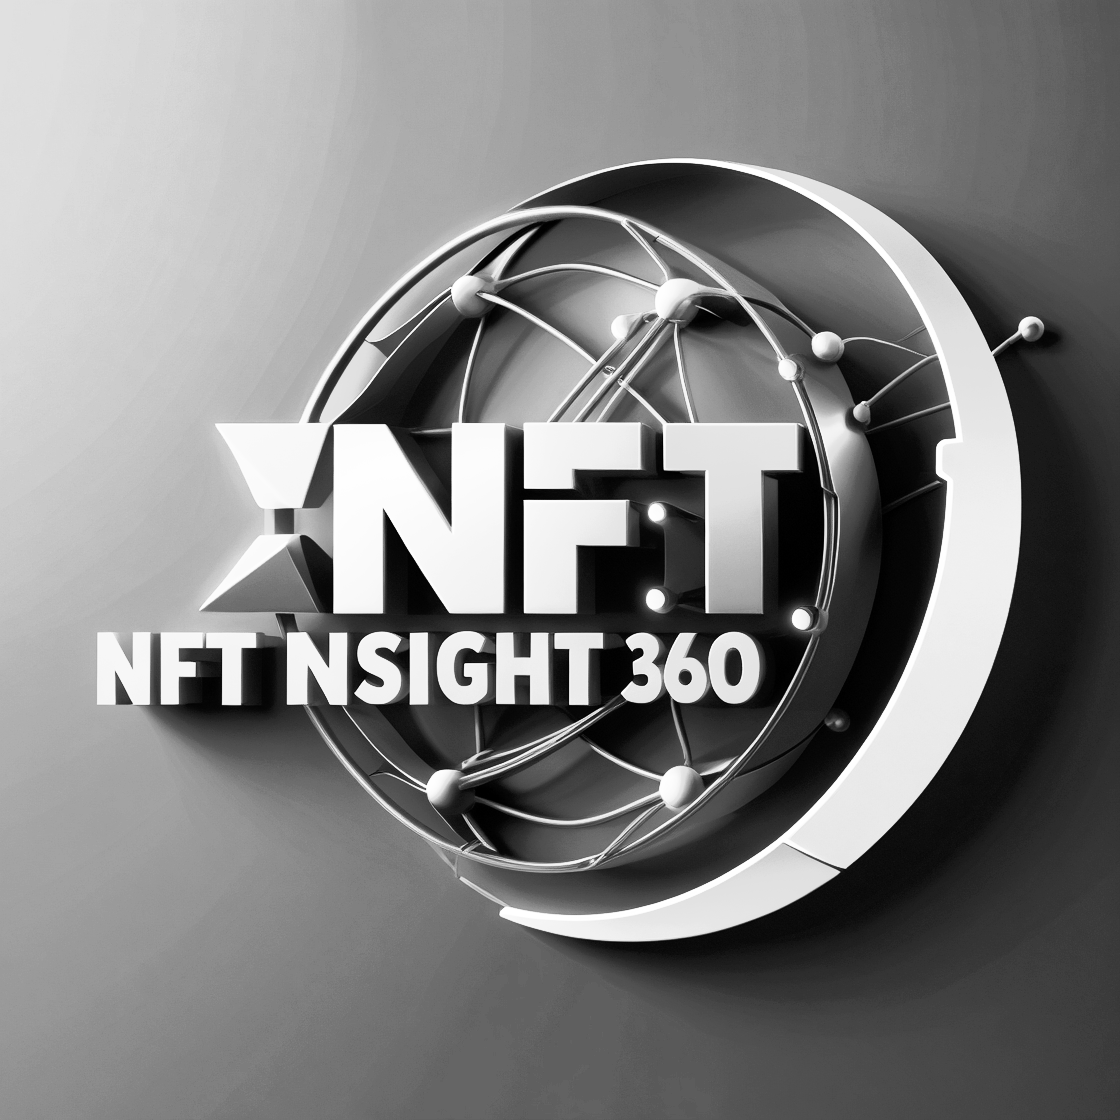

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from google.colab.patches import cv2_imshow

def compute_histogram(image, color=False):
    if color:
        channels = ('b', 'g', 'r')
        hist_data = [cv2.calcHist([image], [i], None, [256], [0, 256]) for i in range(3)]
        return hist_data, channels
    else:
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        return hist


def visualize_histogram(image, title, color=False):
    plt.figure()
    plt.title(title)
    plt.xlabel("Gray Level / Intensity Value")
    plt.ylabel("Number of Pixels")

    if color:
        hist_data, channels = compute_histogram(image, color=True)
        for hist, col in zip(hist_data, channels):
            plt.plot(hist, color=col)
    else:
        hist = compute_histogram(image, color=False)
        plt.plot(hist, color='black')

    plt.xlim([0, 256])
    plt.show()


def histogram_probability(image):
    hist = compute_histogram(image)
    hist_prob = hist / hist.sum()  # Normalize histogram

    plt.figure()
    plt.title("Histogram Probability Distribution")
    plt.xlabel("Gray Level")
    plt.ylabel("Probability")
    plt.plot(hist_prob, color='black')
    plt.xlim([0, 256])
    plt.show()

def contrast_enhancement(image):
    if len(image.shape) == 2:  # Grayscale Image
        eq_img = cv2.equalizeHist(image)
    else:  # Color Image
        channels = cv2.split(image)
        eq_channels = [cv2.equalizeHist(ch) for ch in channels]
        eq_img = cv2.merge(eq_channels)
    return eq_img

def process_image(image_path):

    color_image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(color_image, cv2.COLOR_BGR2GRAY)

    visualize_histogram(gray_image, "Grayscale Histogram")
    visualize_histogram(color_image, "Color Image Histogram", color=True)

    histogram_probability(gray_image)

    enhanced_image = contrast_enhancement(gray_image)

    cv2_imshow(gray_image)
    cv2_imshow(enhanced_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

iimage_path = "image.jpg"
process_image("/content/WhatsApp Image 2025-01-20 at 16.54.41.jpeg")

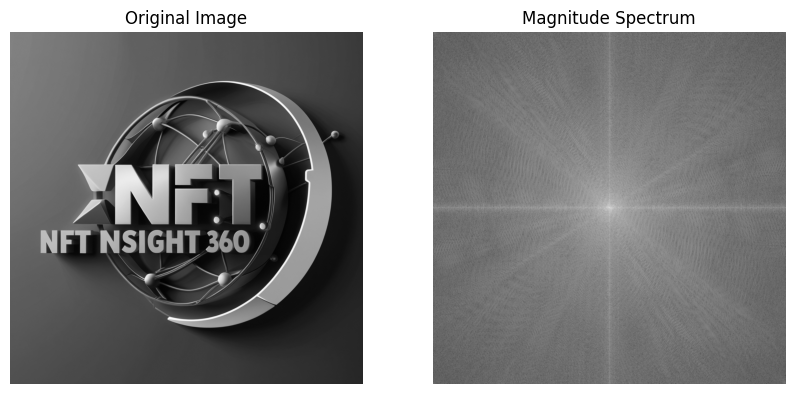

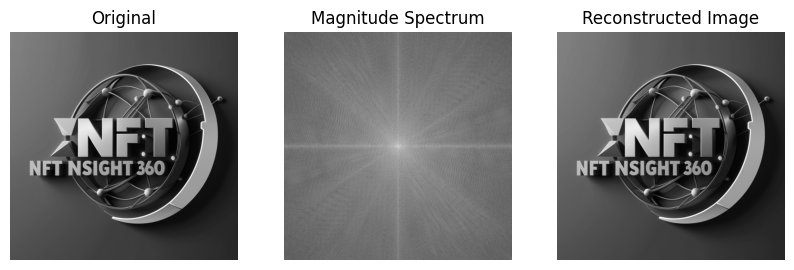

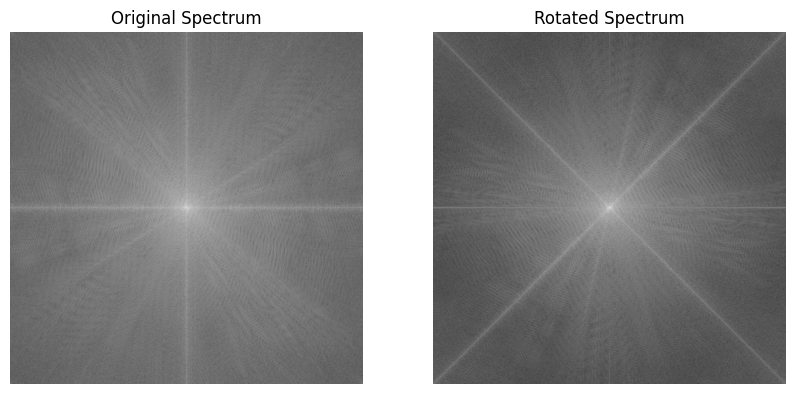

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


image = cv2.imread('/content/WhatsApp Image 2025-01-20 at 16.54.41.jpeg', cv2.IMREAD_GRAYSCALE)

def compute_fft(image):
    f = np.fft.fft2(image)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = 20 * np.log(np.abs(fshift))
    return fshift, magnitude_spectrum

#(IFFT)
def compute_ifft(fshift):
    f_ishift = np.fft.ifftshift(fshift)
    img_reconstructed = np.fft.ifft2(f_ishift)
    img_reconstructed = np.abs(img_reconstructed)
    return img_reconstructed

def rotate_image(image, angle):
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h))
    return rotated

def display_images(images, titles, cmap='gray'):
    plt.figure(figsize=(10, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

#magnitude spectrum
fshift, magnitude_spectrum = compute_fft(image)
display_images([image, magnitude_spectrum], ["Original Image", "Magnitude Spectrum"])

#reconstructed image
img_reconstructed = compute_ifft(fshift)
display_images([image, magnitude_spectrum, img_reconstructed], ["Original", "Magnitude Spectrum", "Reconstructed Image"])

rotated_image = rotate_image(image, 45)

fshift_rot, magnitude_spectrum_rot = compute_fft(rotated_image)

display_images([magnitude_spectrum, magnitude_spectrum_rot], ["Original Spectrum", "Rotated Spectrum"])